In [1]:
#Biblioteki
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/janszopa/ML_intro_24-25/refs/heads/main/data/Loan_Default.csv')

In [3]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
rows = data.shape[0]
col = data.shape[1]
print(f'Wiersze: {rows}, Kolumny: {col}')

Wiersze: 148670, Kolumny: 34


In [5]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


## Winoski 
* year -> jedyna wartóść to 2019
* rate_of_interest min -> 0, dziwne?
* Interest_rate_spread wartosc min < 0, dziwne?
* Income min < 0
* Przy wykresach zwrocic uwage na atrybut term 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

print(missing_data_summary[missing_data_summary['Missing Values'] > 0]) # Obcinam dla czytelnosci te, ktore nie maja brakujacych wartosci

                           Missing Values  Percentage (%)
Upfront_charges                     39642       26.664425
Interest_rate_spread                36639       24.644515
rate_of_interest                    36439       24.509989
dtir1                               24121       16.224524
LTV                                 15098       10.155378
property_value                      15098       10.155378
income                               9150        6.154571
loan_limit                           3344        2.249277
approv_in_adv                         908        0.610749
submission_of_application             200        0.134526
age                                   200        0.134526
loan_purpose                          134        0.090133
Neg_ammortization                     121        0.081388
term                                   41        0.027578


## Wnioski
* Upfront_charges, Interest_rate_spread, rate_of_interest mają duza i bardzo podobną liczbę braków
* LTV i income tyle samo braków
* age i submission_of_application tyle samo braków
* approv_in_adv, age, submission_of_application, loan_purpose, Neg_ammortization, term procentowo mają bardzo mało braków, moze wystarczy usunąć
* W reszcie pewnie trzeba będzie spróbować uzupełnić braki, income/loan_limit do przemyślenia

In [8]:
data['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

# Winoski
* Liczba wartości null w rate_of_interest, Interest_rate_spread, Upfront_charges jest bardzo podobna do liczby odmów kredytu

In [9]:
data['Interest_rate_spread'].loc[data['Status'] == 1].info()   
# wychodzi 0 non-null wartości

<class 'pandas.core.series.Series'>
Index: 36639 entries, 0 to 148663
Series name: Interest_rate_spread
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 572.5 KB


In [ ]:
tmp = data['age'].isnull() == data['submission_of_application'].isnull()
tmp.value_counts()
# wychodzą same wartości true

True    148670
Name: count, dtype: int64

In [11]:
con1 = data['Status'] == 1 & ~data['rate_of_interest'].isnull()
con2 = data['age'].isnull() & data['submission_of_application'].isnull()

data1 = data.loc[con1 & con2]
columns = ['rate_of_interest', 'age', 'submission_of_application', 'Status']
data1[columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 266 to 148239
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rate_of_interest           200 non-null    float64
 1   age                        0 non-null      object 
 2   submission_of_application  0 non-null      object 
 3   Status                     200 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.8+ KB


# Wnioski
* Dla kadego Status = 1, mamy null w Interest_rate_spread
* Braki w age i submission_of_application są powiązane, nalezą do tych samych rekordów
* Osoby nie mające null w rate_of_interest i mające status 1, mają null w age i w submission_of_application
* Dla Status = 1, w większości mamy rate_of_interest = null, a dla 200 rekordów gdzie róne od null, mamy przypadek z powyszego punktu
* moze to wynikać z błędów w danych

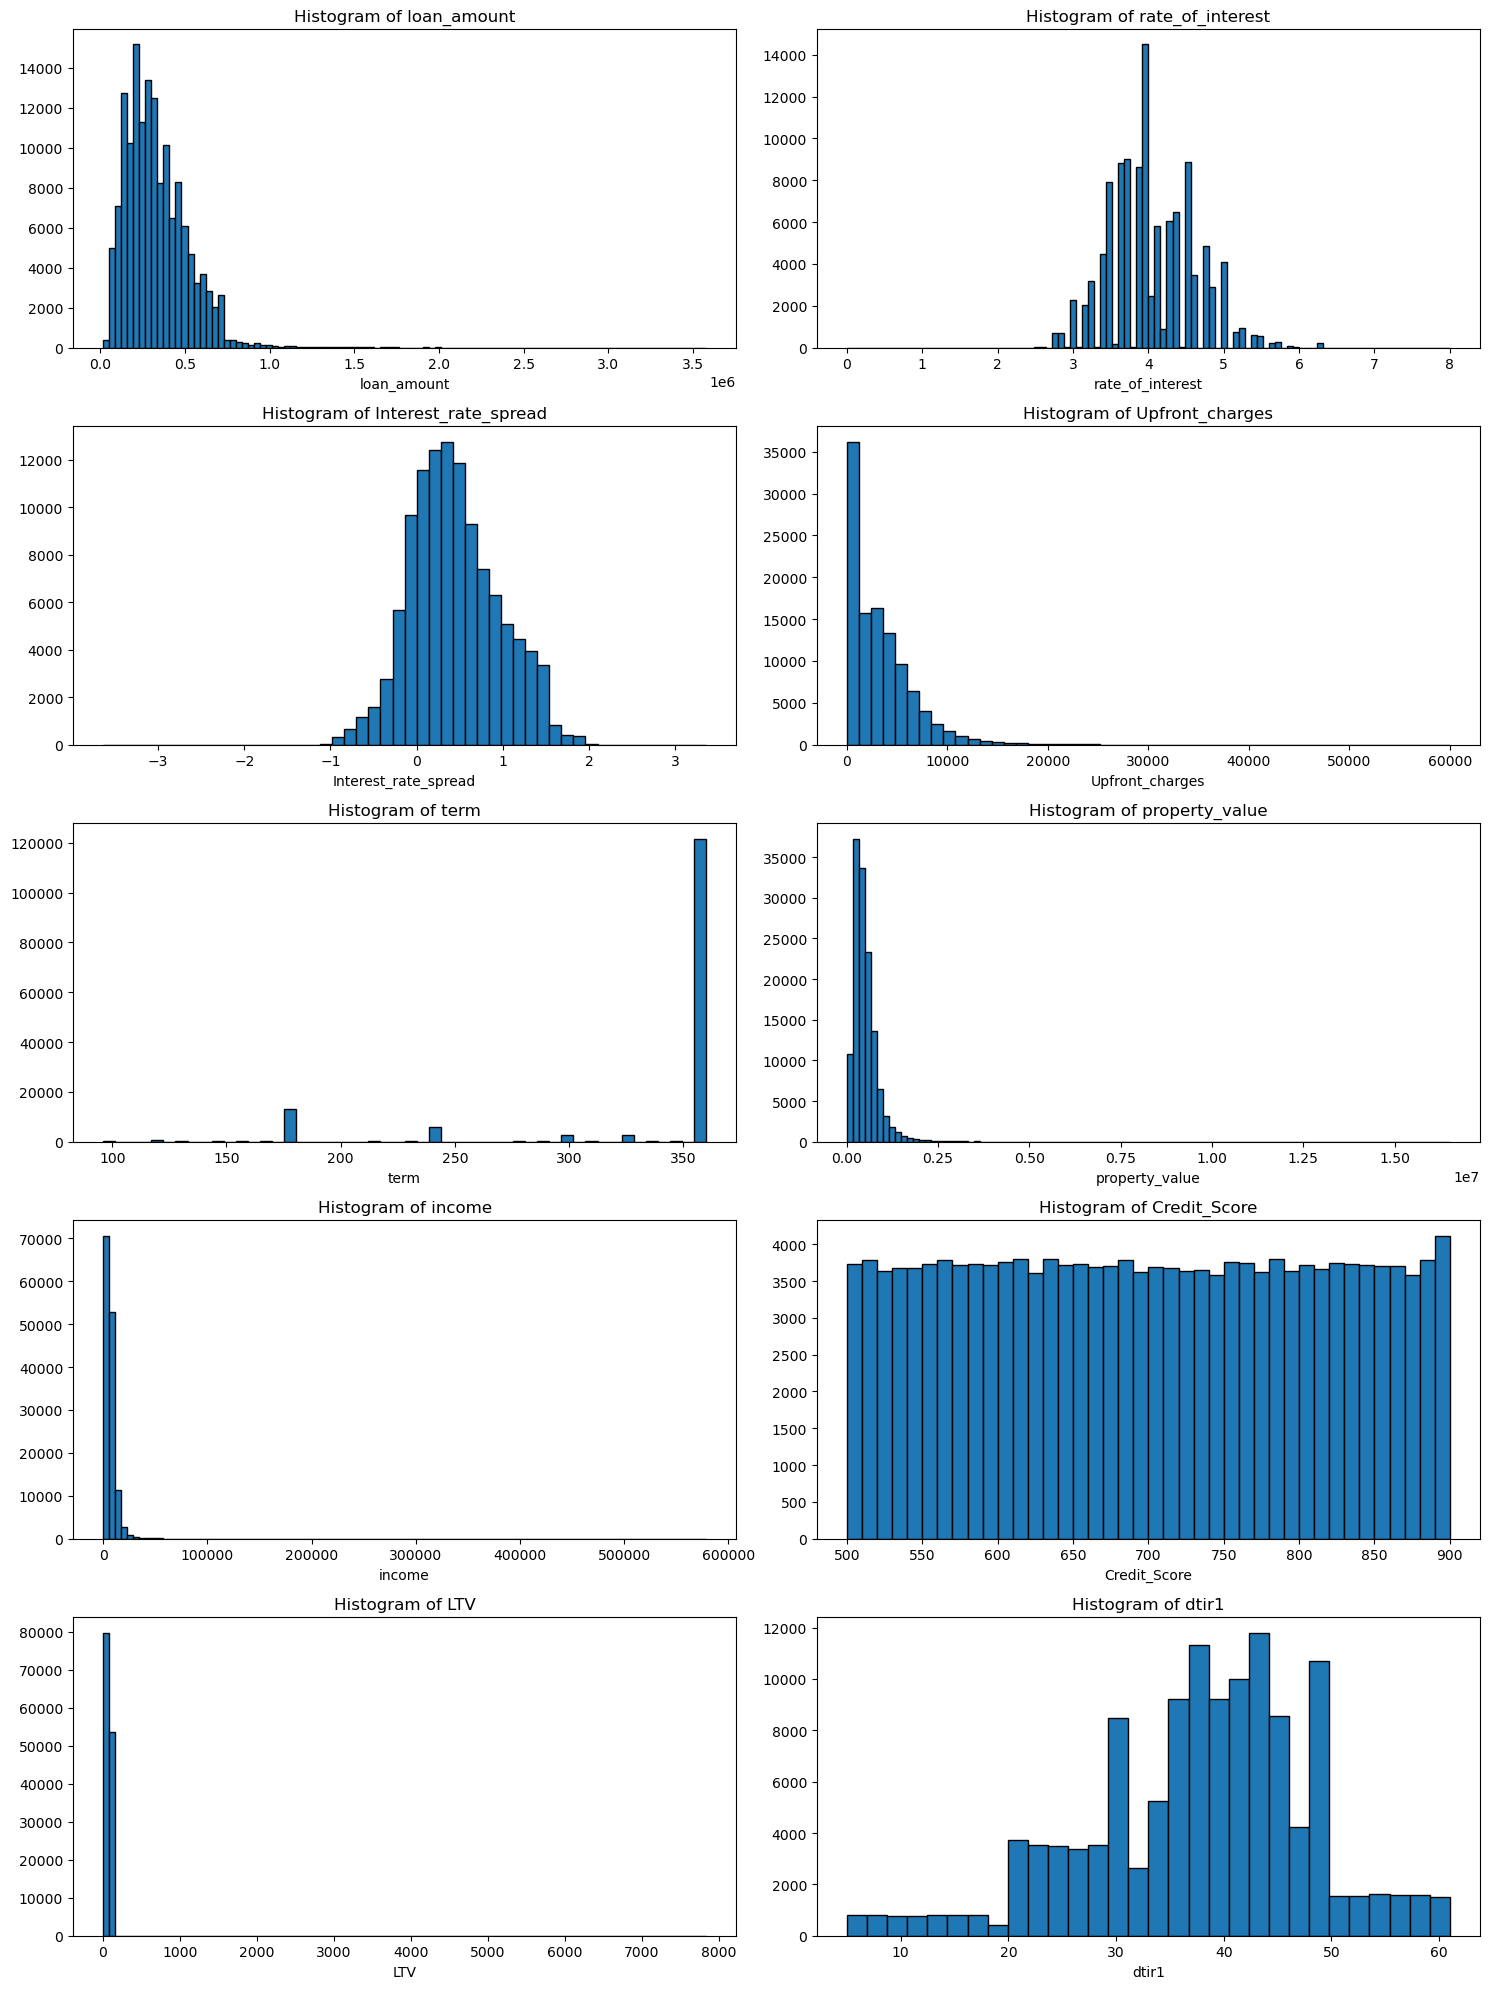

In [12]:
# Patrze na wszystkie zmienne liczbowe poza ID ,year(zawsze 2019) i Status(0/1), bo nic ciekawego nie bedzie na histogramie

plt.figure(figsize=(15, 20))
plt.subplot(5, 2, 1)
plt.hist(data['loan_amount'].dropna(), bins=100, edgecolor='k')
plt.title(f'Histogram of loan_amount')
plt.xlabel('loan_amount')

plt.subplot(5, 2, 2)
plt.hist(data['rate_of_interest'].dropna(), bins=100, edgecolor='k')
plt.title(f'Histogram of rate_of_interest')
plt.xlabel('rate_of_interest')

plt.subplot(5, 2, 3)
plt.hist(data['Interest_rate_spread'].dropna(), bins=50, edgecolor='k')
plt.title(f'Histogram of Interest_rate_spread')
plt.xlabel('Interest_rate_spread')

plt.subplot(5, 2, 4)
plt.hist(data['Upfront_charges'].dropna(), bins=50, edgecolor='k')
plt.title(f'Histogram of Upfront_charges')
plt.xlabel('Upfront_charges')

plt.subplot(5, 2, 5)
plt.hist(data['term'].dropna(), bins=50, edgecolor='k')
plt.title(f'Histogram of term')
plt.xlabel('term')

plt.subplot(5, 2, 6)
plt.hist(data['property_value'].dropna(), bins=100, edgecolor='k')
plt.title(f'Histogram of property_value')
plt.xlabel('property_value')

plt.subplot(5, 2, 7)
plt.hist(data['income'].dropna(), bins=100, edgecolor='k')
plt.title(f'Histogram of income')
plt.xlabel('income')

plt.subplot(5, 2, 8)
plt.hist(data['Credit_Score'].dropna(), bins=40, edgecolor='k')
plt.title(f'Histogram of Credit_Score')
plt.xlabel('Credit_Score')

plt.subplot(5, 2, 9)
plt.hist(data['LTV'].dropna(), bins=100, edgecolor='k')
plt.title(f'Histogram of LTV')
plt.xlabel('LTV')

plt.subplot(5, 2, 10)
plt.hist(data['dtir1'].dropna(), bins=30, edgecolor='k')
plt.title(f'Histogram of dtir1')
plt.xlabel('dtir1')

plt.tight_layout()
plt.show()

## Wnioski
### loan_amount
* Przypomina rozkład normalny
* Widać nieweilką ilość znacząco większych wartości, prawdopodobnie wartości odstające 
### rate_of_interest
* Tez przypomina rozkład normalny
* Dziwne zachowanie przy wartości 4, bardzo duza róznica między sąsiednimi słupkami
### interest_rate_spread
* rozkład normalny 
### Upfront_charges
* Najwięcej małych wartości, ze wzrostem Upfront_charges szybko maleje ich liczba wystąpnień
### term
*
### property_value
*
### income
*
### Credit_score
*
### LTV
*
### dtir1
*

In [ ]:
# Winoski pairplot
# Credit_score wazne dla decyzji o kredycue(status)
# Im wyzsze Loan_amount tym więcej odmów kredytu(pomaranczowy kolor)
